# Orthonality 2.0

http://dspace.nwu.ac.za/bitstream/handle/10394/9722/Van_der_Westhuizen_N.pdf?sequence=1

https://cfdisrael.blog/2019/02/01/know-thy-mesh-mesh-quality-part-i/

http://support.moldex3d.com/r16/en/modelpreparation_reference-pre_meshqualitydefinition.html

https://journals.sagepub.com/doi/pdf/10.1260/1748-3018.6.1.129

https://mescalea.grupossc.com/content/mobilePdf/Mesh-Intro_19R2_M05_Lecture_Slides_Mesh_Quality_and_Advanced_Topics.pdf

**face orthogonality**

In [1]:
import numpy as np
import pyvista
import math

In [2]:
#Defining the points of the mesh
points = np.array([[0,0,0],
                  [2,0,0],
                  [1,1,0],
                  [4,0,0],
                  [3,1,0],
                  [1,-1,0],
                  [3,-1,0],
                  [6,0,0],
                  [5,1,0],
                  [5,-1,0],
                  [2,-2,0],
                  [4,-2,0]])
#Defining the cells of the mesh
cells = [[3, 0,1,2], 
         [3, 1,3,4],
         [3, 1,4,2],
         [3, 0,5,1],
         [3, 5,6,1],
         [3, 6,3,1],
         [3, 3,8,4],
         [3, 3,7,8],
         [3, 6,3,9],
         [3, 9,7,3],
         [3, 5,10,6],
         [3, 10,11,6],
         [3, 11,9,6]]

In [3]:
if cells[0][0] == 3: #If the mesh is triangular
    z1 = 3
    z2 = 5
    
elif cells[0][0] == 4: #If the mesh is square
    z1 = 4
    z2 = 6

In [4]:
#----------------------------------------------#
#----Creating a center point in each cell------#
#----------------------------------------------#

len_cells = len(cells) #the total number of cells in the mesh
len_points = len(points)
Orthogonality = []

if z1 ==3: #if triangle
    for y in range(0,len_cells):
        p=[]
        i = 0
        
        d = cells[y][1]
        e = cells[y][2]
        f = cells[y][3]
    
        for x in range(1,5):
            if i < z1:
                a = points[cells[y][x]]
                p.append(a)
                i = i+1
            elif i == z1:
                center = (p[0]+p[1]+p[2])/3
                point1 = ((points[e]+points[d])/2) #creating a additional point in the middle of the first edge of the side
                point2 = ((points[f]+points[e])/2) #creating a additional point in the middle of the second edge of the side
                point3 = ((points[d]+points[f])/2) #creating a additional point in the middle of the third edge of the side 
                
                e1= point1-center #center to point1
                e2= point2-center #center to point2
                e3= point3-center #center to point3
                vectors_e = [e1[:2],e2[:2],e3[:2]]
                
                v1= points[e]-points[d]
                v2= points[f]-points[e]
                v3= points[d]-points[f]
                
                #v=(a,b) u=(b,-a) #perpendicular
                A1= (v1[1],-v1[0]) #perpendicular to side de
                A2= (v2[1],-v2[0])#perpendicular to side ef
                A3= (v3[1],-v3[0])#perpendicular to side fd
                vectors_A=[A1,A2,A3]
                
                orth = []
                for o in range(0,3):
                    dot_e_A = abs((vectors_A[o][0]*vectors_e[o][0])+(vectors_A[o][1]*vectors_e[o][1]))
                    magnitude_e = math.sqrt((vectors_e[o][0])**2+(vectors_e[o][1])**2)
                    magnitude_A = math.sqrt((vectors_A[o][0])**2+(vectors_A[o][1])**2)
                    ort = (dot_e_A)/(magnitude_e*magnitude_A)
                    orth.append(ort)
                Orthogonality.append(min(orth))

                                        
elif z1==4: #if square

    for y in range(0,len_cells):
        p=[]
        i = 0
        
        d = cells[y][1]
        e = cells[y][2]
        f = cells[y][3]
        g = cells[y][4]
        
        for x in range(1,5):
            if i < z1:
                a = points[cells[y][x]]
                p.append(a)
                i = i+1
            elif i == z1:
                center = (p[0]+p[1]+p[2]+p[3])/4
                point1 = ((points[e]+points[d])/2) #creating a additional point in the middle of the first edge of the side
                point2 = ((points[f]+points[e])/2) #creating a additional point in the middle of the second edge of the side
                point3 = ((points[g]+points[f])/2) #creating a additional point in the middle of the third edge of the side
                point4 = ((points[f]+points[d])/2) #creating a additional point in the middle of the third edge of the side
                
                e1= point1-center #center to point1
                e2= point2-center #center to point2
                e3= point3-center #center to point3
                e4= point4-center #center to point4
                vectors_e = [e1[:2],e2[:2],e3[:2], e4[:2]]
                
                v1= points[e]-points[d]
                v2= points[f]-points[e]
                v3= points[g]-points[f]
                v4= points[d]-points[g]
                
                #v=(a,b) u=(b,-a) #perpendicular
                A1= (v1[1],-v1[0]) #perpendicular to side de
                A2= (v2[1],-v2[0])#perpendicular to side ef
                A3= (v3[1],-v3[0])#perpendicular to side fg
                A3= (v4[1],-v4[0])#perpendicular to side gd
                vectors_A=[A1,A2,A3,A4]
                
                orth = []
                for o in range(0,4):
                    dot_e_A = abs((vectors_A[o][0]*vectors_e[o][0])+(vectors_A[o][1]*vectors_e[o][1]))
                    magnitude_e = math.sqrt((vectors_e[o][0])**2+(vectors_e[o][1])**2)
                    magnitude_A = math.sqrt((vectors_A[o][0])**2+(vectors_A[o][1])**2)
                    ort = (dot_e_A)/(magnitude_e*magnitude_A)
                    orth.append(ort)
                Orthogonality.append(min(orth))
print(Orthogonality)

[0.8944271909999159, 0.8944271909999159, 0.8944271909999157, 0.8944271909999159, 0.8944271909999157, 0.8944271909999159, 0.8944271909999157, 0.8944271909999159, 0.8944271909999157, 0.8944271909999159, 0.8944271909999159, 0.8944271909999159, 0.8944271909999159]


C:\Users\20192167\Anaconda3\lib\site-packages\pyvista\jupyter\notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


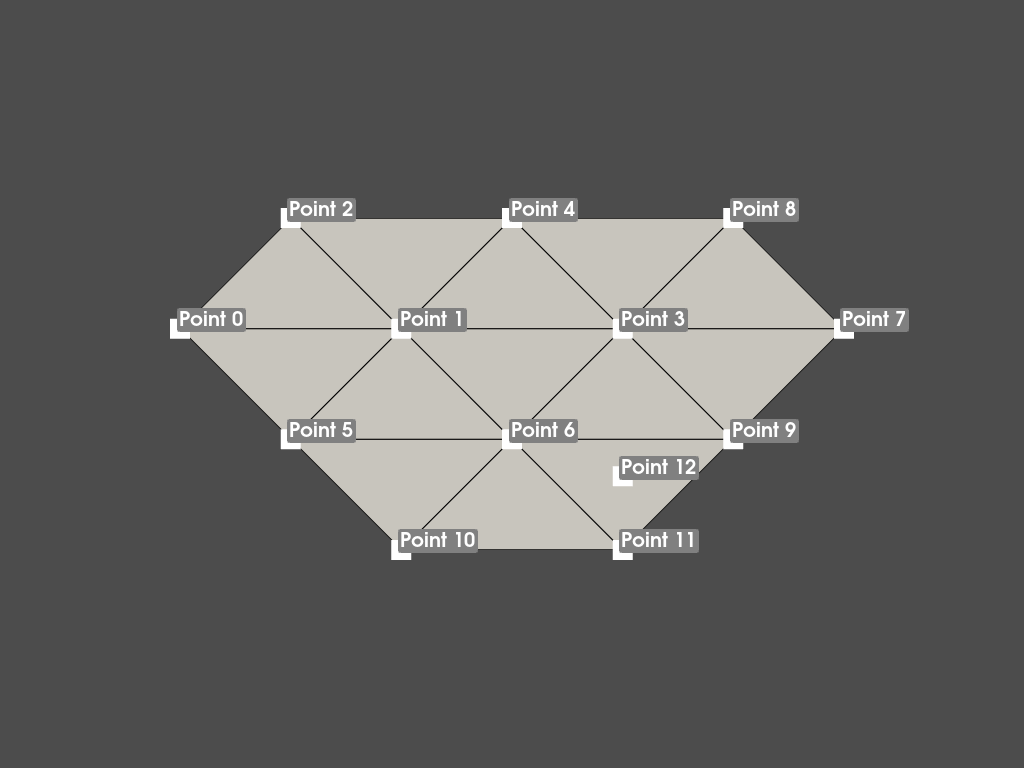

In [5]:
points1= np.vstack((points,center))
#-------------------------------------------#
#---------Plotting the new mesh-------------#
#-------------------------------------------#
mesh = pyvista.PolyData(points1, cells)
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=0.5)
label_coords = mesh.points + [0, 0, 0.01]
pl.add_point_labels(label_coords, [f'Point {i}' for i in range(len(points1))],
                    font_size=20, point_size=20)
pl.camera_position = 'xy'
pl.show() 